C:\Users\Administrator\AppData\Local\Temp\ipykernel_19364\2096788505.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  5 of 5 completed

Data loaded. Starting Monte Carlo Simulation...


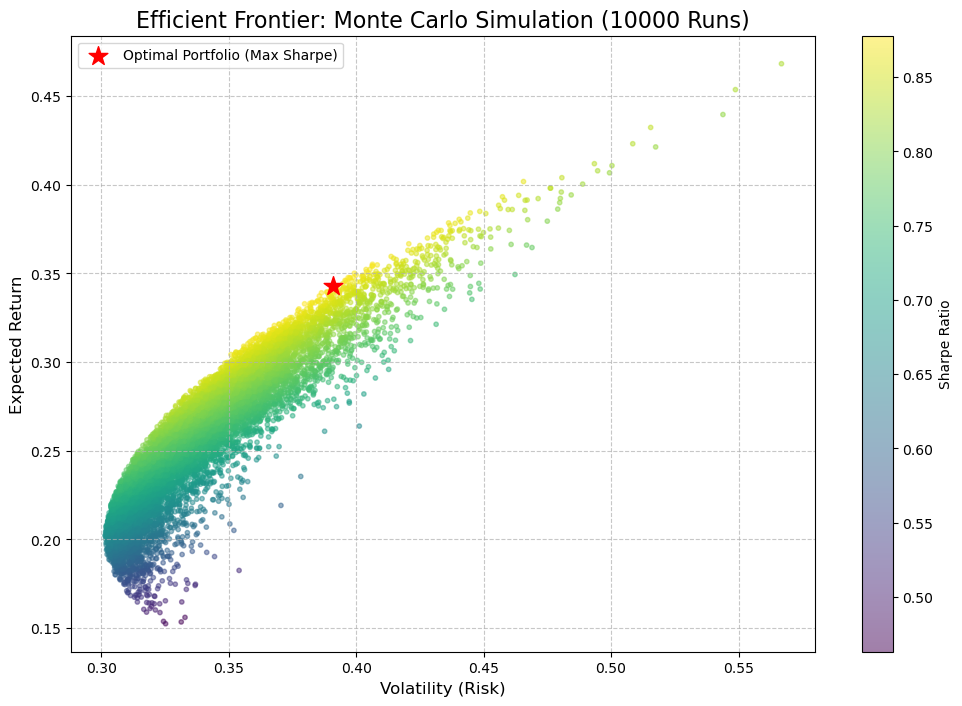

--------------------------------------------------
OPTIMIZATION RESULTS:
Max Sharpe Ratio: 0.88
Annualized Return: 34.30%
Annualized Volatility: 39.07%
--------------------------------------------------
OPTIMAL ASSET ALLOCATION:
AAPL: 36.56%
MSFT: 0.15%
GOOGL: 6.50%
AMZN: 20.37%
TSLA: 36.42%
--------------------------------------------------


In [4]:
# --- PROJECT 2: PORTFOLIO OPTIMIZATION (MARKOWITZ MODEL) ---
# Author: Fares Awwad-Zeidan
# Concept: Modern Portfolio Theory (MPT) & Monte Carlo Simulation
# Objective: Find the optimal asset weights to maximize the Sharpe Ratio.

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. DATA MINING (The Input)
# ==========================================
# We select a basket of 5 major Tech Assets for diversification analysis.
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = "2020-01-01"
end_date = "2024-01-01"

print(f"Downloading data for: {tickers}...")
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# ==========================================
# 2. MATHEMATICAL MODELLING (The Hard Science)
# ==========================================
# We use LOG RETURNS instead of simple returns because they are time-additive 
# and better for statistical modeling.
log_returns = np.log(data / data.shift(1))

# COVARIANCE MATRIX: This is the heart of MPT. 
# It measures how stocks move *together*. (252 = trading days in a year)
cov_matrix = log_returns.cov() * 252 

print("Data loaded. Starting Monte Carlo Simulation...")

# ==========================================
# 3. MONTE CARLO SIMULATION (The Engine)
# ==========================================
# We will generate 10,000 random portfolios to find the best one.

num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(tickers)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for i in range(num_portfolios):
    # A. Create Random Weights
    weights = np.array(np.random.random(len(tickers)))
    
    # B. Normalize weights (so they sum up to 100%)
    weights = weights / np.sum(weights)
    
    # Save weights
    all_weights[i,:] = weights
    
    # C. Calculate Expected Return (Annualized)
    ret_arr[i] = np.sum(log_returns.mean() * weights) * 252
    
    # D. Calculate Expected Volatility (Standard Deviation)
    # The Linear Algebra formula: sqrt(w.T * Cov * w)
    vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # E. Calculate Sharpe Ratio (Risk-Free Rate assumed 0 for simplicity)
    sharpe_arr[i] = ret_arr[i] / vol_arr[i]

# ==========================================
# 4. OPTIMIZATION (Finding the Winner)
# ==========================================
# Find the index of the portfolio with the Max Sharpe Ratio
max_sharpe_idx = sharpe_arr.argmax()
max_sharpe_return = ret_arr[max_sharpe_idx]
max_sharpe_vol = vol_arr[max_sharpe_idx]
optimal_weights = all_weights[max_sharpe_idx,:]

# ==========================================
# 5. VISUALIZATION (The Efficient Frontier)
# ==========================================
plt.figure(figsize=(12, 8))

# Plot all 10,000 portfolios as dots
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', s=10, alpha=0.5)
plt.colorbar(label='Sharpe Ratio')

# Plot the "Golden Star" (The Optimal Portfolio)
plt.scatter(max_sharpe_vol, max_sharpe_return, c='red', s=200, marker='*', label='Optimal Portfolio (Max Sharpe)')

plt.title(f'Efficient Frontier: Monte Carlo Simulation ({num_portfolios} Runs)', fontsize=16)
plt.xlabel('Volatility (Risk)', fontsize=12)
plt.ylabel('Expected Return', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# ==========================================
# 6. FINAL REPORT (The Output)
# ==========================================
print("-" * 50)
print("OPTIMIZATION RESULTS:")
print(f"Max Sharpe Ratio: {sharpe_arr[max_sharpe_idx]:.2f}")
print(f"Annualized Return: {max_sharpe_return*100:.2f}%")
print(f"Annualized Volatility: {max_sharpe_vol*100:.2f}%")
print("-" * 50)
print("OPTIMAL ASSET ALLOCATION:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight*100:.2f}%")
print("-" * 50)